# Service speed
The goal of this code is to explore possible distributions of the service times of the various trucks analyzed in the report. The first two trucks will make use of a data set handed out as part of the task description, whilst the data for the third truck has been gathered at the new student canteen at NHH.

In [1]:
# Importing packages to the Python environment
import pandas as pd                 # Data Wrangling and analysis
import seaborn as sns               # Make the plots look nicer
import matplotlib.pyplot as plt     # Package used for plots
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats             # Analysis package
import numpy as np                  # Data wrangling and analysis
import os  

## Importing data

In [2]:
# Importing the provided service speed data from the text files in the 'data' directory

#The specified data location
path = 'data'

# List the files present in the directory
files = os.listdir(path)

#Print the file names
print(files)

['Service1_sample.txt', 'Walkingfrom_building3.txt', 'Walkingfrom_building1.txt', 'Walkingfrom_building2.txt', 'Walkingfrom_building4.txt', 'Service2_sample.txt', 'nk-observations.csv', 'Walkingfrom_building5.txt', 'desktop.ini']


In [3]:
# Defining a function which imports the service data files
def import_service(txt):
    file_path = "data/" + txt
    df_temp = pd.read_csv(file_path, delimiter='\t',header=None, names=['Service_speed'])
    return(df_temp)

In [4]:
# Saving the data to two data frames named 'service1' and 'service2'
service1 = import_service("Service1_sample.txt")
service2 = import_service("Service2_sample.txt")

## Service time 1
This part of the document will analyse the data for the first food truck. This report assumes that these measurements are made on a food truck comparable to that of FoodTruck3 in the optimization and simulation models.

In [5]:
# Defining the working df as the data stored in service1
df = service1

# Changing column name
column_name = "Service_speed"

# Storing the column names in 'values'
values = df[column_name].values

In [6]:
Mean = values.mean()
SD = values.std()
Max = values.max()
Min = values.min()

print(f"Mean= {Mean}")
print(f"SD= {SD}")
print(f"Max= {Max}")
print(f"Min= {Min}")

Mean= 3.014540445595844
SD= 2.1755038923287056
Max= 14.09853800643591
Min= 0.0808047033028694


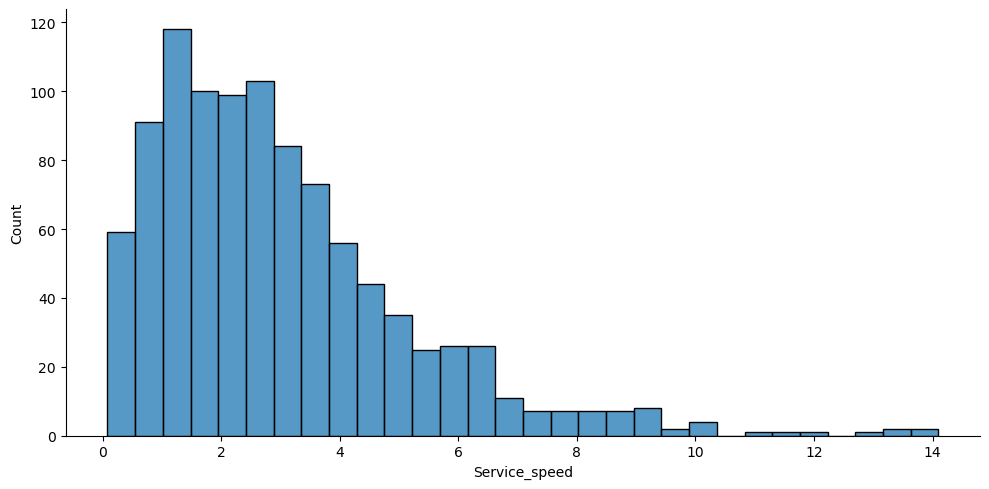

In [7]:
# Making a histogram of the distribution of the observed service speeds
hist = sns.displot(data=df, x=column_name, kind="hist", bins = 30, aspect = 2)

## Fitting the data

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 10.03it/s]


        sumsquare_error          aic           bic  kl_div  ks_statistic   
beta           0.038735   769.305582 -10131.126237     inf      0.017904  \
erlang         0.038768   765.253966 -10137.183776     inf      0.018923   
gamma          0.038769   765.257600 -10137.175628     inf      0.018926   
norm           0.172329  1040.071918  -8652.288874     inf      0.099772   
expon          0.237980   697.067045  -8329.506340     inf      0.131151   

           ks_pvalue  
beta    8.998048e-01  
erlang  8.595364e-01  
gamma   8.593957e-01  
norm    4.059220e-09  
expon   1.855123e-15  


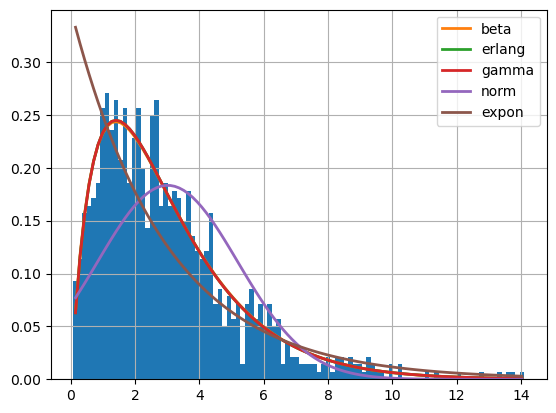

In [8]:
# Fitting various distributions to the observed data
f = Fitter(values, distributions =['norm', 'expon', 'gamma', 'erlang', 'beta'])
f.fit()
y = f.summary()
print(y)

In [9]:
# Print the parameters
for el in y.index: 
    print(f'parameters for {el}: {f.fitted_param[el]}')

parameters for beta: (1.8163017690861027, 113.80689744656084, 0.04512510864360049, 189.02839178548425)
parameters for erlang: (1.852047815196116, 0.040378908890771135, 1.6058908909451073)
parameters for gamma: (1.8520444950597348, 0.040384075842298, 1.6058802852367908)
parameters for norm: (3.014540445595844, 2.1755038923287056)
parameters for expon: (0.0808047033028694, 2.9337357422929746)


## Testing the data

KSTest for exponential
KS statistics = 0.131150827128678
p-value = 1.855123051515096e-15
p-value goodness_of_fit= 0.0001

p-value goodness_of_fit= 0.8935

KSTest for gamma
KS statistics = 0.015754930477735907
p-value = 0.9617588324323365
p-value goodness_of_fit= 0.9606


<Axes: title={'center': 'Fitted $\\tt gamma$ PDF and Histogram'}, xlabel='x', ylabel='PDF'>

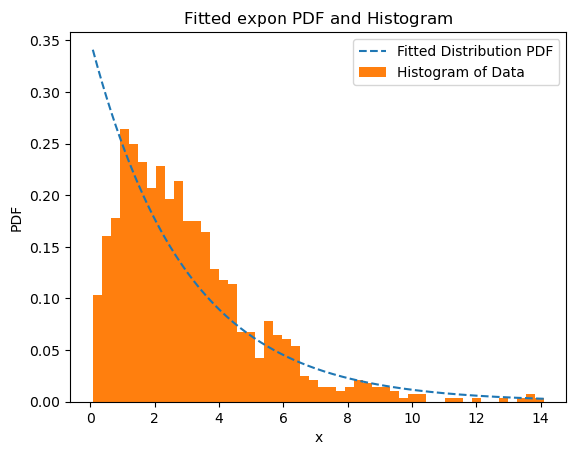

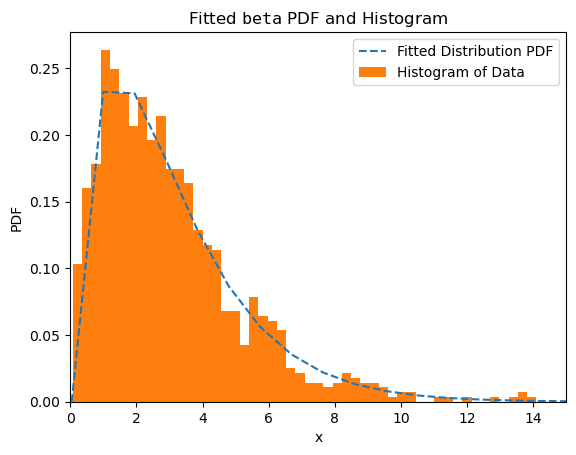

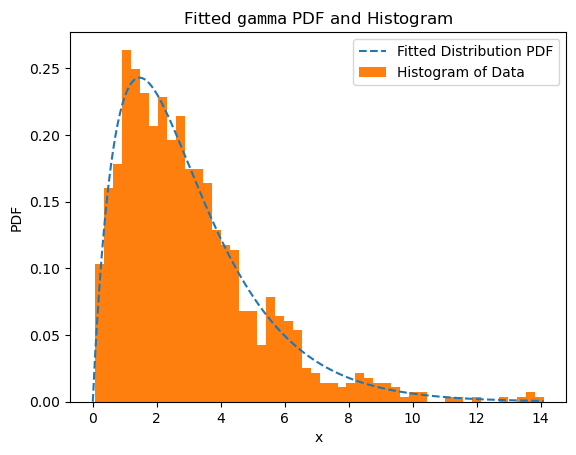

In [10]:
# KS test Exponential
teststat, pvalue = stats.kstest(values, 'expon', args=(f.fitted_param['expon'][0],f.fitted_param['expon'][1]))
print("KSTest for exponential")
print(f"KS statistics = {teststat}")
print(f"p-value = {pvalue}")

res_expon= stats.goodness_of_fit(stats.expon, values, known_params={'loc':f.fitted_param["expon"][0], 'scale':f.fitted_param["expon"][1]},statistic='ks')
print(f"p-value goodness_of_fit= {res_expon.pvalue}")
plt.figure(3)
res_expon.fit_result.plot()
print("")


# KS test for Beta
fit1 = stats.beta.fit(values,method="MLE")

res_beta= stats.goodness_of_fit(stats.beta, values, known_params={'a':fit1[0], 'b': fit1[1], 'loc': fit1[2], 'scale':fit1[3]},statistic='ks')
print(f"p-value goodness_of_fit= {res_beta.pvalue}")
plt.figure(4)
plt.xlim([0, 15])
res_beta.fit_result.plot()
print("")

# KS Test for Gamma
fit_params = stats.gamma.fit(values, floc=0)
teststat, pvalue = stats.kstest(values, 'gamma', args=(fit_params))
print("KSTest for gamma")
print(f"KS statistics = {teststat}")
print(f"p-value = {pvalue}")

res_gamma= stats.goodness_of_fit(stats.gamma, values, known_params={'a':fit_params[0], 'loc':fit_params[1], 'scale':fit_params[2]},statistic='ks')
print(f"p-value goodness_of_fit= {res_gamma.pvalue}")
plt.figure(5)
res_gamma.fit_result.plot()

### Output of the Analysis - Truck3
In order to make use of the insights gained from this model, the relevant output is stored as text files in the `output` folder in the working directory. As discussed in the input analysis of the report, the gamma distribution is chosen as the distribution for the food trucks in the simulation model.

In [11]:
alpha, loc, scale = f.fitted_param['gamma']
alpha, loc, scale

(1.8520444950597348, 0.040384075842298, 1.6058802852367908)

In [12]:
mean_gamma = stats.gamma.mean(a=1.8520444950597348, scale = 1.6058802852367908)
print(f"mean gamma= {mean_gamma}")
plt.show()

mean gamma= 2.9741617419977553


In [13]:
with open('output/service1-param.txt', 'w') as file:
    file.write(f'Alpha = {alpha}\nLoc = {loc}\nScale = {scale}\nGamma_Mean = {mean_gamma}\nMean = {Mean}\nSD = {SD}\nMin = {Min}\nMax = {Max}\ngof_expon = {res_expon.pvalue}\ngof_beta = {res_beta.pvalue}\ngof_gamma = {res_gamma.pvalue}')

In [14]:
y = y.round(4)
y.to_csv('output/service1-dist.txt', sep='\t', index=True)

## Service 2
This part of the document will analyse the data for the second food truck. This report assumes that these measurements are made on a food truck comparable to that of FoodTruck5 in the optimization and simulation models.

In [15]:
# Defining the working df as the data stored in service1
df = service2

# Changing column name
column_name = "Service_speed"

# Storing the column names in 'values'
values = df[column_name].values

# From this point on the code is repeated with the df defined as the service speed of truck 2

In [16]:
Mean = values.mean()
SD = values.std()
Max = values.max()
Min = values.min()

print(f"Mean= {Mean}")
print(f"SD= {SD}")
print(f"Max= {Max}")
print(f"Min= {Min}")

Mean= 2.9745794611316314
SD= 2.1198102108684975
Max= 13.788887641041455
Min= 0.0560718405728488


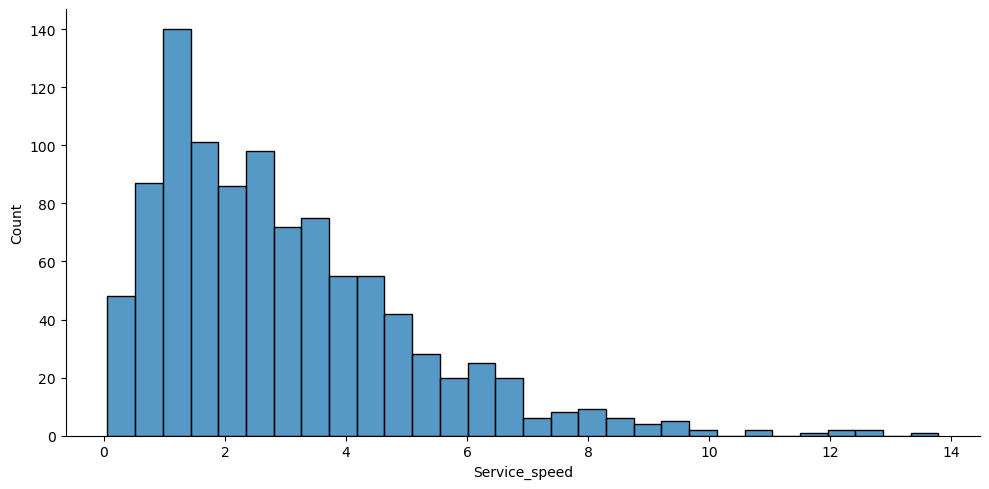

In [17]:
hist = sns.displot(data=df, x=column_name, kind="hist", bins = 30, aspect = 2)

### Fitting the data

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 13.93it/s]


        sumsquare_error          aic          bic  kl_div  ks_statistic   
erlang         0.055508   759.927738 -9778.256184     inf      0.019875  \
gamma          0.055508   759.926551 -9778.253036     inf      0.019877   
beta           0.055879   777.820443 -9764.694208     inf      0.019571   
norm           0.204897  1034.604337 -8479.186068     inf      0.094252   
expon          0.276473   688.756879 -8179.582756     inf      0.134837   

           ks_pvalue  
erlang  8.168127e-01  
gamma   8.167287e-01  
beta    8.308934e-01  
norm    3.500156e-08  
expon   2.564985e-16  


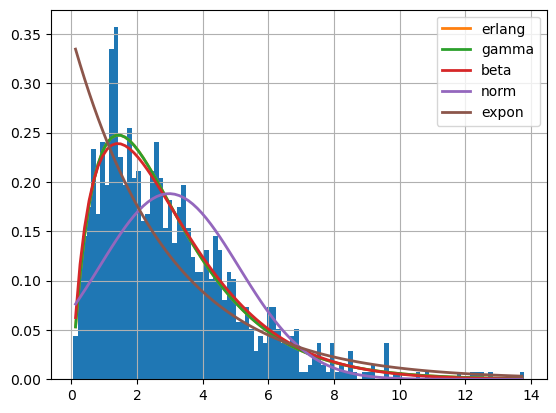

In [18]:
# Fit distribution
f = Fitter(values, distributions =['norm', 'expon', 'gamma', 'erlang', 'beta'])
f.fit()
y = f.summary()
print(y)

In [19]:
# Print the parameters
for el in y.index: 
    print(f'parameters for {el}: {f.fitted_param[el]}')

parameters for erlang: (1.9098929950891466, 0.022253804119836212, 1.5458001075026426)
parameters for gamma: (1.9099187137072549, 0.022238190057749095, 1.5457931712203528)
parameters for beta: (1.724371303070831, 18.598047124030757, 0.03896214460736404, 34.64036213672916)
parameters for norm: (2.9745794611316314, 2.1198102108684975)
parameters for expon: (0.0560718405728488, 2.9185076205587825)


### Testing the data

KSTest for exponential
KS statistics = 0.13483688154355467
p-value = 2.564985244227419e-16
p-value goodness_of_fit= 0.0001

p-value goodness_of_fit= 0.8299

KSTest for gamma
KS statistics = 0.021864961482183864
p-value = 0.7168586772658512
p-value goodness_of_fit= 0.7171


<Axes: title={'center': 'Fitted $\\tt gamma$ PDF and Histogram'}, xlabel='x', ylabel='PDF'>

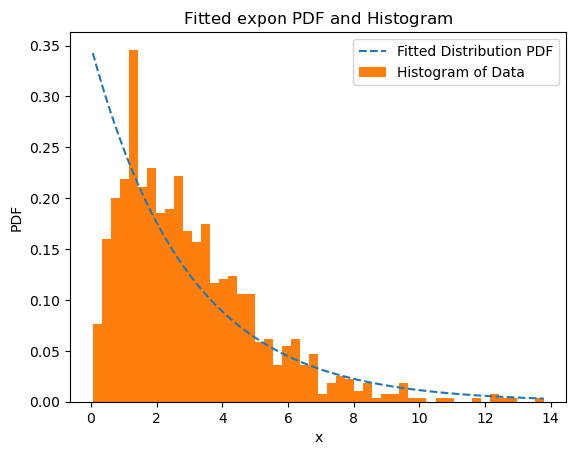

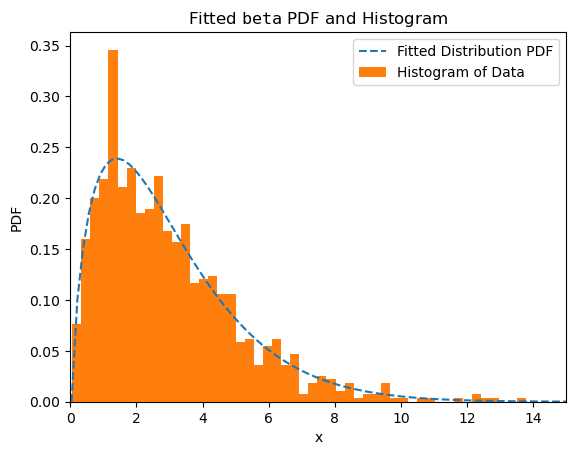

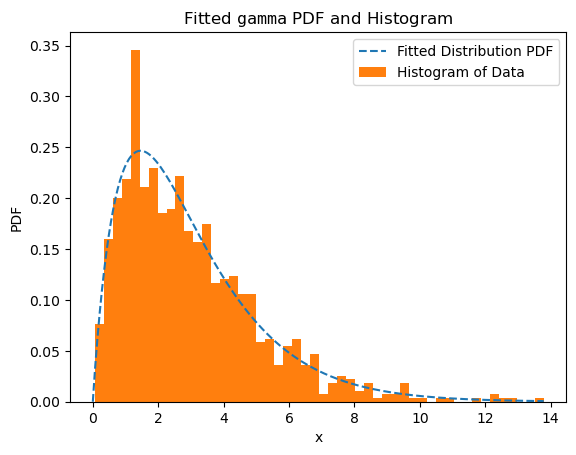

In [20]:
# KS test Exponential
teststat, pvalue = stats.kstest(values, 'expon', args=(f.fitted_param['expon'][0],f.fitted_param['expon'][1]))
print("KSTest for exponential")
print(f"KS statistics = {teststat}")
print(f"p-value = {pvalue}")

res_expon= stats.goodness_of_fit(stats.expon, values, known_params={'loc':f.fitted_param["expon"][0], 'scale':f.fitted_param["expon"][1]},statistic='ks')
print(f"p-value goodness_of_fit= {res_expon.pvalue}")
plt.figure(3)
res_expon.fit_result.plot()
print("")


# KS test for Beta
fit1 = stats.beta.fit(values,method="MLE")

res_beta= stats.goodness_of_fit(stats.beta, values, known_params={'a':fit1[0], 'b': fit1[1], 'loc': fit1[2], 'scale':fit1[3]},statistic='ks')
print(f"p-value goodness_of_fit= {res_beta.pvalue}")
plt.figure(4)
plt.xlim([0, 15])
res_beta.fit_result.plot()
print("")

# KS Test for Gamma
fit_params = stats.gamma.fit(values, floc=0)
teststat, pvalue = stats.kstest(values, 'gamma', args=(fit_params))
print("KSTest for gamma")
print(f"KS statistics = {teststat}")
print(f"p-value = {pvalue}")

res_gamma= stats.goodness_of_fit(stats.gamma, values, known_params={'a':fit_params[0], 'loc':fit_params[1], 'scale':fit_params[2]},statistic='ks')
print(f"p-value goodness_of_fit= {res_gamma.pvalue}")
plt.figure(5)
res_gamma.fit_result.plot()

### Output of the Analysis - Truck5
In order to make use of the insights gained from this model, the relevant output is stored as text files in the `output` folder in the working directory. As discussed in the input analysis of the report, the gamma distribution is chosen as the distribution for the food trucks in the simulation model.

In [21]:
alpha, loc, scale = f.fitted_param['gamma']
alpha, loc, scale

(1.9099187137072549, 0.022238190057749095, 1.5457931712203528)

In [22]:
mean_gamma = stats.gamma.mean(a=1.9099187137072549, scale = 1.5457931712203528)
print(f"mean gamma= {mean_gamma}")
plt.show()

mean gamma= 2.9523393052346347


In [23]:
with open('output/service2-param.txt', 'w') as file:
    file.write(f'Alpha = {alpha}\nLoc = {loc}\nScale = {scale}\nGamma_Mean = {mean_gamma}\nMean = {Mean}\nSD = {SD}\nMin = {Min}\nMax = {Max}\ngof_expon = {res_expon.pvalue}\ngof_beta = {res_beta.pvalue}\ngof_gamma = {res_gamma.pvalue}')

In [24]:
y = y.round(4)
y.to_csv('output/service2-dist.txt', sep='\t', index=True)

# Analysis of the observed service times at a café
In this part of the document, an analysis of the observed and collected data from Merino Kaffebar will be analyzed and combined in order to make use of it when discussing the possibility of addressing the service level of Gurobi by adding a new truck to the city. The relevant output is stored as text files in the `output` folder in the working directory.

In [25]:
# Loading in the .csv file from the 'data' folder in the directory, containing the observed data
df_nk = pd.read_csv("data/nk-observations.csv").iloc[:,1:-3]

# Creating a function which converts the numbers with decimal places to rounded integers
def convert_time_sec_to_int(df):
    df['time_sec'] = [round(float(i.replace(',', '.'))) if ',' in i else int(i) for i in df['time_sec']]
    return df

# Applying the function to the observation dataset
df_nk = convert_time_sec_to_int(df_nk)

# Converting so minutes to be in the same format as Service1 and Service2
df_nk['time_sec'] = df_nk['time_sec']/60

In [26]:
# By using the .head() function it is possible to get a understanding of the structure of the data
df_nk.head()

,time_sec,product_class,hour
0,0.183333,Soda,13
1,0.733333,Snack,13
2,0.150000,Snack,13
3,0.183333,Soda,13
4,0.500000,Coffee,13


In [27]:
# Defining the working df as the data stored in service1
df = df_nk

# Changing column name
column_name = "time_sec"

# Storing the column names in 'values'
values = df[column_name].values

In [28]:
Mean = values.mean()
SD = values.std()
Max = values.max()
Min = values.min()

print(f"Mean= {Mean}")
print(f"SD= {SD}")
print(f"Max= {Max}")
print(f"Min= {Min}")

Mean= 0.8649425287356322
SD= 1.4230541923078497
Max= 7.45
Min= 0.11666666666666667


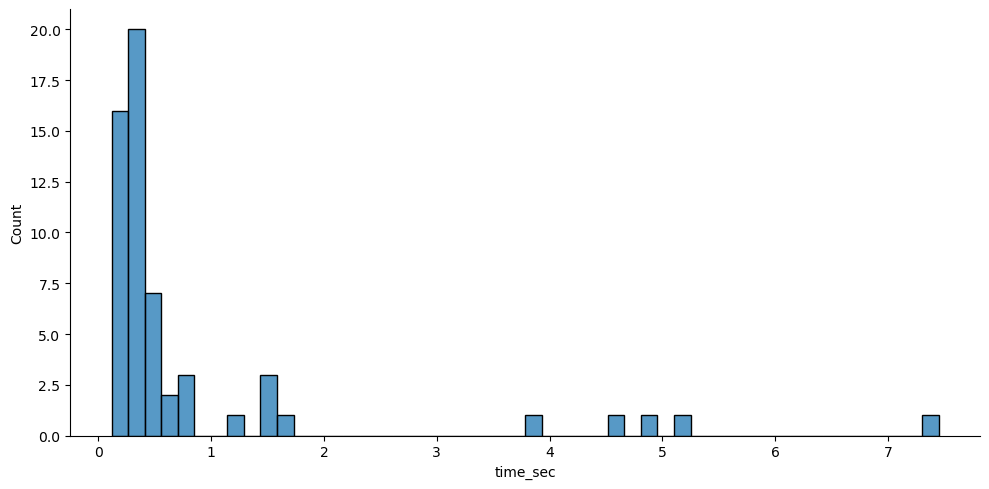

In [29]:
# Making a histogram of the distribution of the observed service speeds
hist = sns.displot(data=df, x=column_name, kind="hist", bins = 50, aspect = 2)

### Fitting the data

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  8.34it/s]


        sumsquare_error         aic         bic  kl_div  ks_statistic   
beta           6.479892  901.130458 -110.879103     inf      0.184881  \
expon          7.389749  926.034008 -111.379366     inf      0.330179   
gamma          7.401514  760.412771 -107.226660     inf      0.190272   
erlang         9.676884  585.875019  -91.679448     inf      0.273730   
norm          17.031786  900.200835  -62.950091     inf      0.342533   

        ks_pvalue  
beta     0.032996  
expon    0.000004  
gamma    0.025926  
erlang   0.000248  
norm     0.000001  


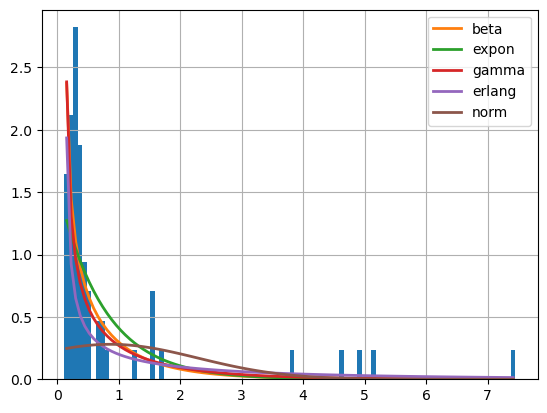

In [30]:
# Fit distribution
f = Fitter(values, distributions =['norm', 'expon', 'gamma', 'erlang', 'beta'])
f.fit()
y = f.summary()
print(y)

In [31]:
# Print the parameters
for el in y.index: 
    print(f'parameters for {el}: {f.fitted_param[el]}')

parameters for beta: (0.6156182943974541, 368.1414613738066, 0.11666666666666665, 364.9923857342127)
parameters for expon: (0.11666666666666667, 0.7482758620689655)
parameters for gamma: (0.4980927921854995, 0.11666666666666665, 1.4627703343812128)
parameters for erlang: (0.33950703490193745, 0.11666666666666665, 5.057139003961657)
parameters for norm: (0.8649425287356322, 1.4230541923078497)


### Testing the data

KSTest for exponential
KS statistics = 0.3301792861943882
p-value = 3.901108144239088e-06
p-value goodness_of_fit= 0.0001

p-value goodness_of_fit= 0.0343

KSTest for gamma
KS statistics = 0.26744982335725664
p-value = 0.0003743625686740459
p-value goodness_of_fit= 0.0006


<Axes: title={'center': 'Fitted $\\tt gamma$ PDF and Histogram'}, xlabel='x', ylabel='PDF'>

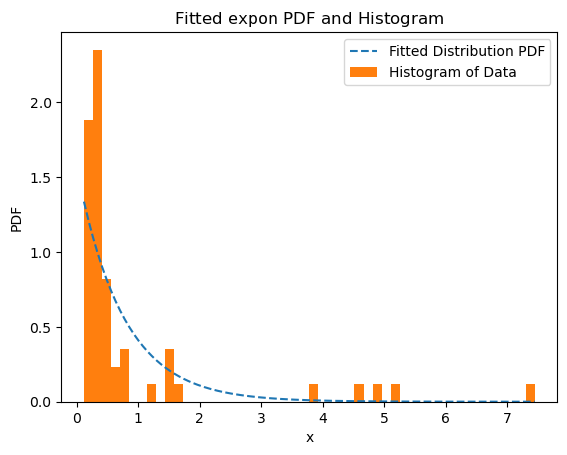

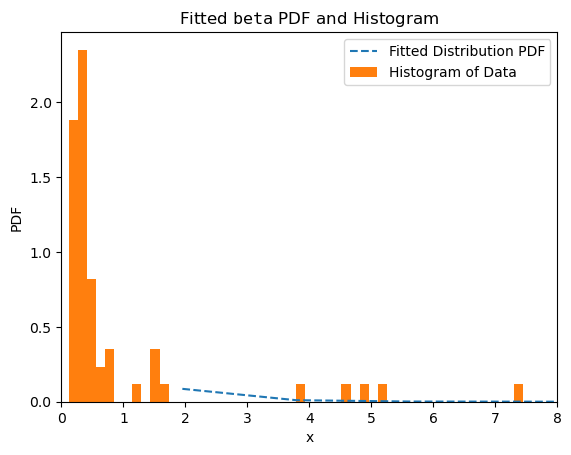

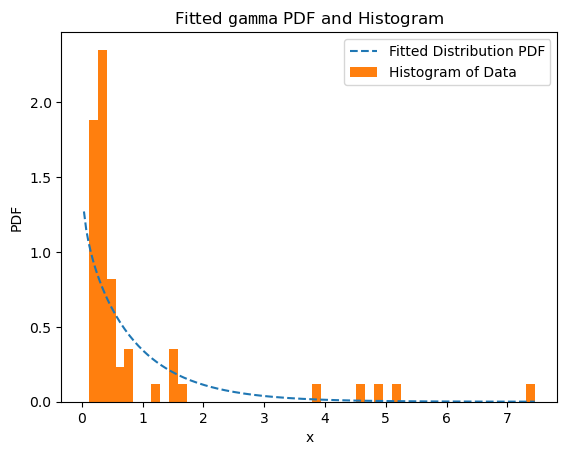

In [32]:
# KS test Exponential
teststat, pvalue = stats.kstest(values, 'expon', args=(f.fitted_param['expon'][0],f.fitted_param['expon'][1]))
print("KSTest for exponential")
print(f"KS statistics = {teststat}")
print(f"p-value = {pvalue}")

res_expon= stats.goodness_of_fit(stats.expon, values, known_params={'loc':f.fitted_param["expon"][0], 'scale':f.fitted_param["expon"][1]},statistic='ks')
print(f"p-value goodness_of_fit= {res_expon.pvalue}")
plt.figure(3)
res_expon.fit_result.plot()
print("")


# KS test for Beta
fit1 = stats.beta.fit(values,method="MLE")

res_beta= stats.goodness_of_fit(stats.beta, values, known_params={'a':fit1[0], 'b': fit1[1], 'loc': fit1[2], 'scale':fit1[3]},statistic='ks')
print(f"p-value goodness_of_fit= {res_beta.pvalue}")
plt.figure(4)
plt.xlim([0, 8])
res_beta.fit_result.plot()
print("")

# KS Test for Gamma
fit_params = stats.gamma.fit(values, floc=0)
teststat, pvalue = stats.kstest(values, 'gamma', args=(fit_params))
print("KSTest for gamma")
print(f"KS statistics = {teststat}")
print(f"p-value = {pvalue}")

res_gamma= stats.goodness_of_fit(stats.gamma, values, known_params={'a':fit_params[0], 'loc':fit_params[1], 'scale':fit_params[2]},statistic='ks')
print(f"p-value goodness_of_fit= {res_gamma.pvalue}")
plt.figure(5)
res_gamma.fit_result.plot()

### Output of the Analysis of NK - Truck6
In order to make use of the insights gained from this model, the relevant output is stored as text files in the `output` folder in the working directory. As discussed in the input analysis of the report, the gamma distribution is chosen as the distribution for the food trucks in the simulation model.

In [33]:
alpha, loc, scale = f.fitted_param['gamma']
alpha, loc, scale

(0.4980927921854995, 0.11666666666666665, 1.4627703343812128)

In [34]:
mean_gamma = stats.gamma.mean(a=0.4980927921854995, scale = 1.4627703343812128)
print(f"mean gamma= {mean_gamma}")
plt.show()

mean gamma= 0.728595360178055


In [35]:
with open('output/NK-param.txt', 'w') as file:
    file.write(f'Alpha = {alpha}\nLoc = {loc}\nScale = {scale}\nGamma_Mean = {mean_gamma}\nMean = {Mean}\nSD = {SD}\nMin = {Min}\nMax = {Max}\ngof_expon = {res_expon.pvalue}\ngof_beta = {res_beta.pvalue}\ngof_gamma = {res_gamma.pvalue}')

In [36]:
y = y.round(4)
y.to_csv('output/NK-dist.txt', sep='\t', index=True)